In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys 
sys.path.append('../../src')

In [6]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_melanoma.h5ad')
adata

/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4804 × 3401
    obs: 'X', 'Y', 'cell_type', 'author_cell_type', 'cell_type_int'
    uns: 'author_cell_type_colors', 'cell_thresholds', 'neighbors', 'pca', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count'
    obsp: 'connectivities', 'distances'

In [7]:
from spaceoracle.tools.network import RegulatoryFactory
co_grn = RegulatoryFactory(
    colinks_path='/Users/koush/Desktop/training_data/snrna_human_melanoma_colinks.pkl',
    annot='cell_type_int'
)

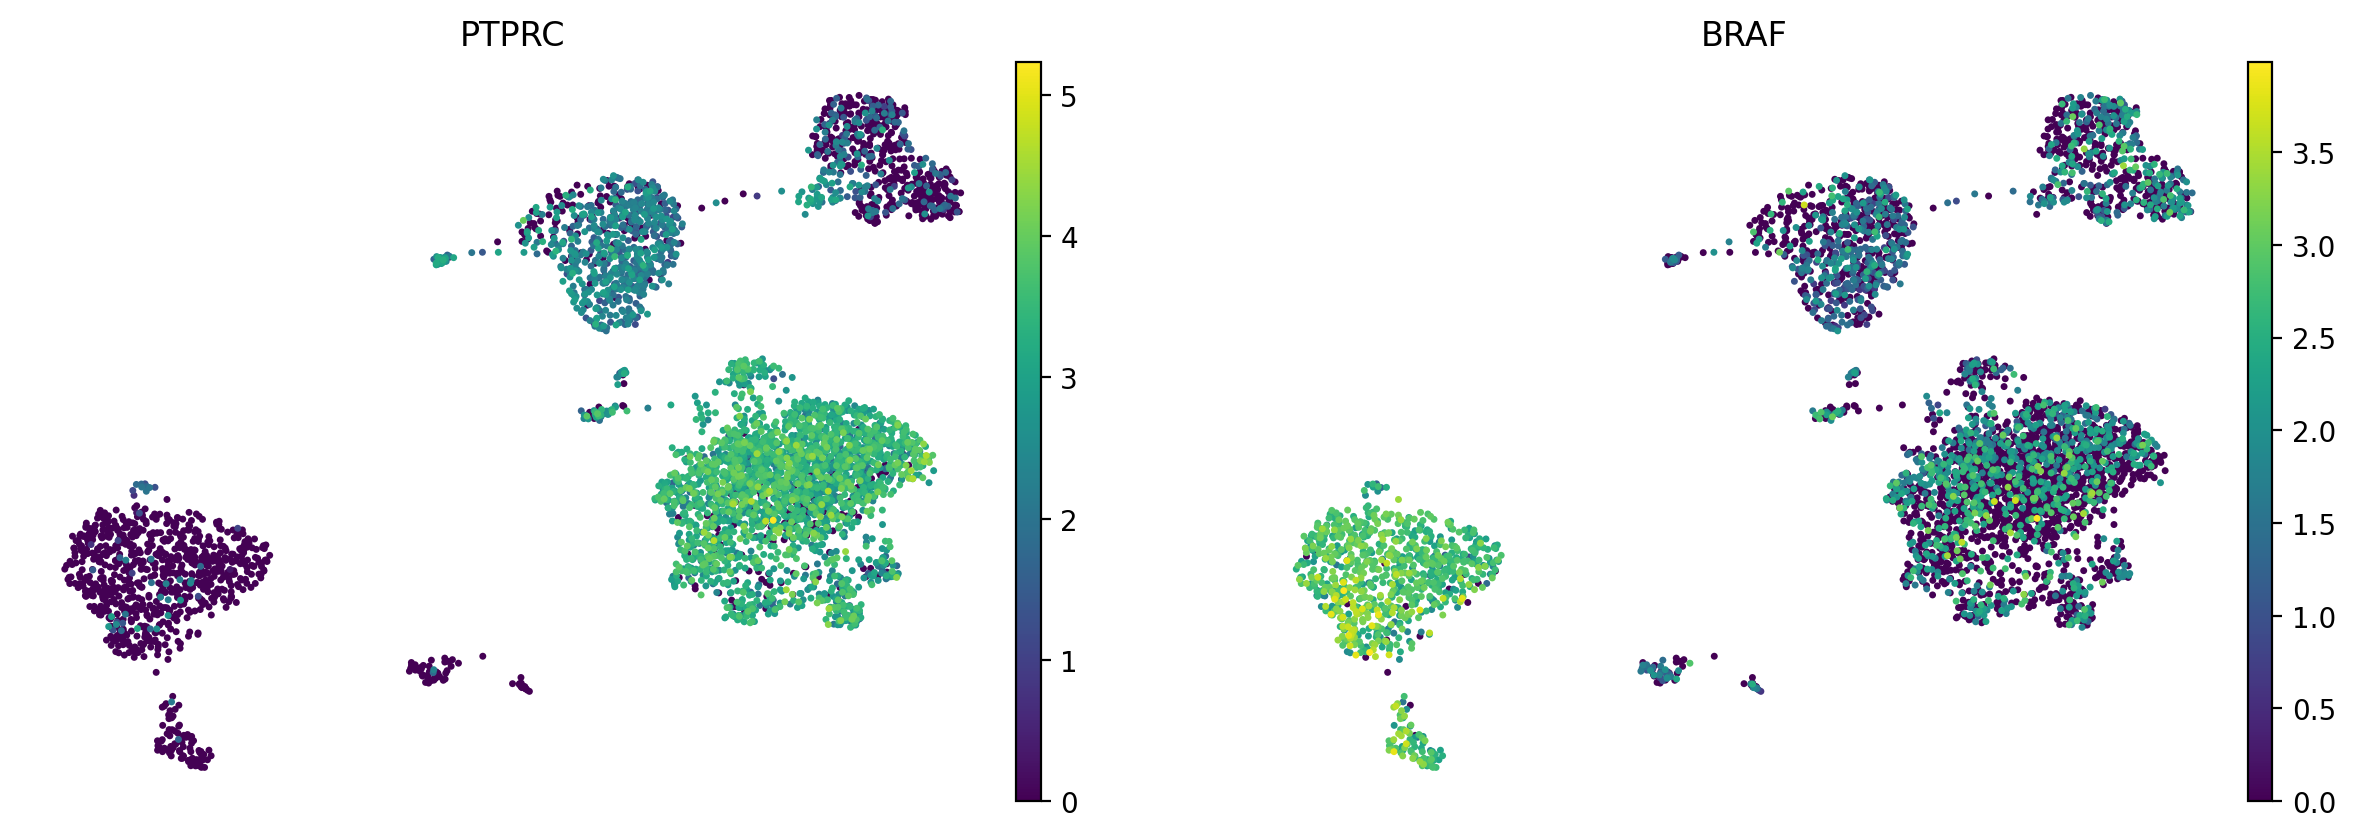

In [8]:
sc.pl.umap(adata, color=['PTPRC', 'BRAF'], frameon=False)

In [9]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

estimator = SpatialCellularProgramsEstimator(
    adata, 
    target_gene='BRAF', 
    cluster_annot='cell_type_int',
    radius=400, 
    contact_distance=50, 
    grn=co_grn
)

In [11]:
estimator.regulators

[]

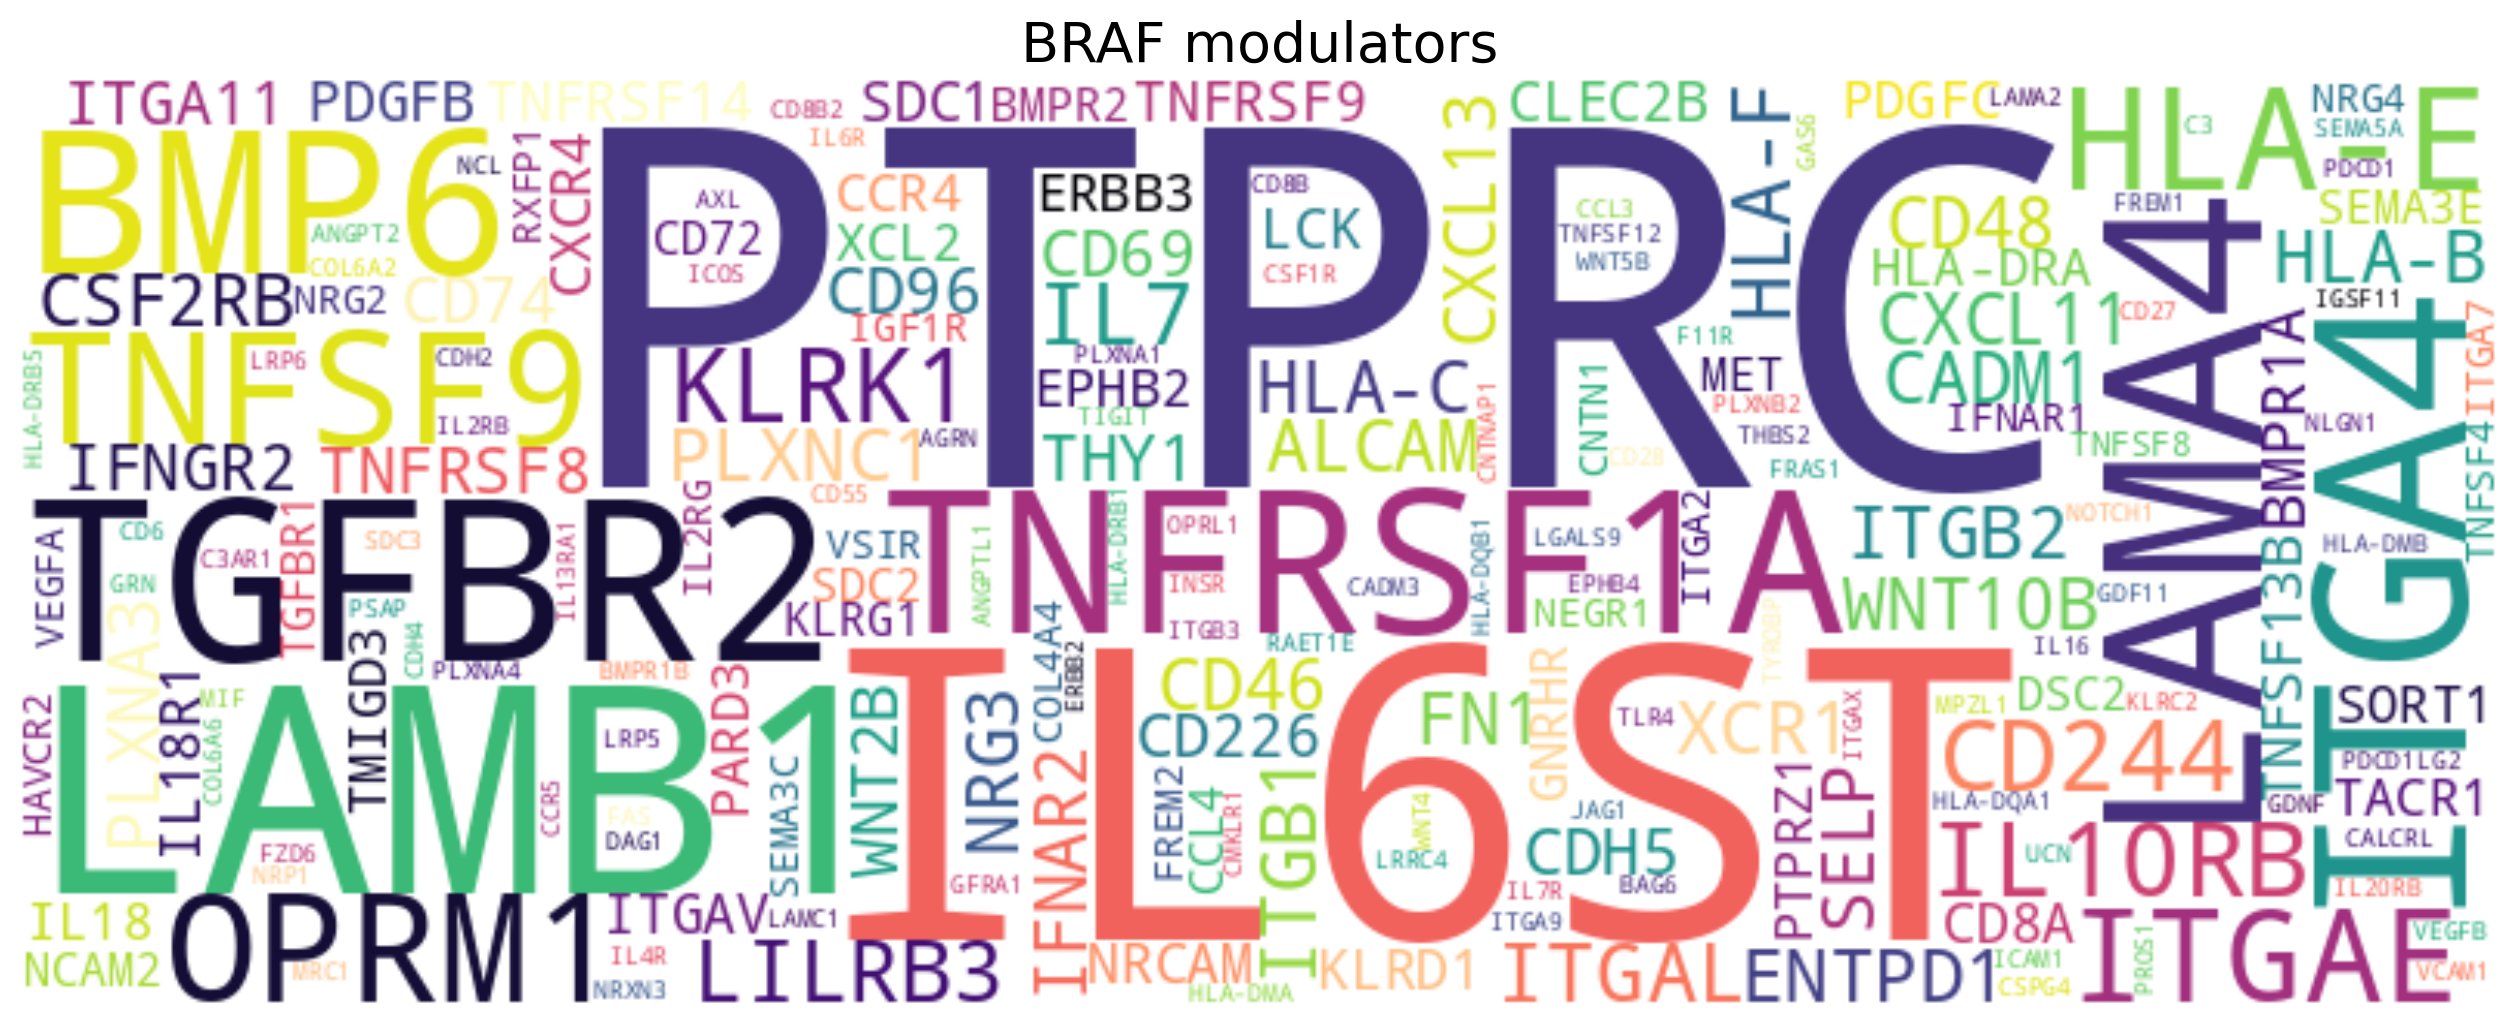

In [10]:
estimator.plot_modulators()

In [ ]:
estimator.fit(
    num_epochs=20, 
    learning_rate=5e-3, 
)

Fitting PTPRC with 1039 modulators
	11 Transcription Factors
	983 Ligand-Receptor Pairs
	45 TranscriptionFactor-Ligand Pairs
0: 0.4004 | 0.5849
1: 0.5821 | 0.5896
2: 0.6539 | 0.7183
3: 0.9976 | 0.9992
4: 0.9844 | 0.9849
5: x.xxxx | 0.2122
6: 0.9462 | 0.9414
7: x.xxx* | 0.0698


In [17]:
betadata = estimator.betadata

In [19]:
betadata[[i for i in betadata.columns if 'IL21' in i and '$' in i]].join(estimator.adata.obs.cell_type).groupby(
    'cell_type').mean()

,beta_IL21$IL21R,beta_IL21$IL2RG
cell_type,,
CD4+ T,0.004376,0.010610
CD8+ T,0.003775,0.005276
Mono-mac,-0.000865,0.000000
Other,-0.004883,-0.001298
Plasma/B,0.002857,0.004383
Treg,0.000000,0.000000
Tumor 1,0.000000,0.000000
Tumor 2,0.000000,0.000000


In [23]:
from spaceoracle.prophets import Prophet
import anndata as ad
import pandas as pd
import matplotlib
from spaceoracle.plotting.cartography import xy_from_adata

In [24]:
xy = xy_from_adata(adata)

In [27]:
betadata

,beta0,beta_BACH2,beta_BATF,beta_BCL11A,beta_CUX2,beta_IKZF2,beta_LHX2,beta_MYBL1,beta_NFKB1,beta_VDR,...,beta_IL15#XBP1,beta_IL6#XBP1,beta_IL4#XBP1,beta_IL21#XBP1,beta_VEGFA#XBP1,beta_IL26#ZNF274,beta_IL27#ZNF274,beta_EBI3#ZNF274,beta_IL21#ZNF274,beta_IL22#ZNF274
AAACCCACAACTGGTT-1,2.714151,-0.230816,0.404637,0.00000,0.000000,0.075955,0.305347,0.568965,0.444736,-0.168239,...,-0.047661,1.018560e-06,5.877865e-07,-0.000307,-0.007808,-0.050356,-0.001881,-0.004979,-0.001080,-0.002132
AAACCCACATCTCCCA-1,-0.007668,0.227299,7.713447,0.00000,0.000000,-0.008722,0.000000,-0.064812,-0.027316,1.484914,...,0.010012,-1.622471e-08,-4.289981e-06,0.000023,0.001000,0.003912,0.000112,0.000368,0.000018,0.000096
AAACCCACATGCAGCC-1,0.000000,-0.000000,-0.000000,0.00000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
AAACCCAGTCTTACTT-1,2.691416,-0.227174,0.406413,0.00000,0.000000,0.075752,0.302197,0.564005,0.445596,-0.164712,...,-0.047340,1.023209e-06,5.856079e-07,-0.000309,-0.007853,-0.049663,-0.001893,-0.004941,-0.001075,-0.002157
AAACCCATCACCTTGC-1,2.631419,-0.020651,-0.288409,-1.05691,0.977941,0.213054,0.000000,0.130326,0.126380,0.486646,...,-0.008731,-1.054148e-04,-2.393192e-05,0.000641,-0.003038,-0.024586,0.001147,0.001913,0.001772,-0.000914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGACCAGCA-1,2.706089,-0.227923,0.403784,0.00000,0.000000,0.075879,0.304471,0.564631,0.444427,-0.166613,...,-0.047847,1.031270e-06,5.859116e-07,-0.000306,-0.007820,-0.049866,-0.001895,-0.004968,-0.001077,-0.002130
TTTGTTGAGAGTCTGG-1,2.700010,-0.229007,0.406759,0.00000,0.000000,0.076077,0.303900,0.566555,0.446122,-0.165698,...,-0.047343,1.016995e-06,5.857177e-07,-0.000308,-0.007856,-0.050147,-0.001884,-0.004943,-0.001073,-0.002149
TTTGTTGCATAGGAGC-1,2.699978,-0.227807,0.403985,0.00000,0.000000,0.075624,0.302837,0.563915,0.444589,-0.166280,...,-0.047555,1.028003e-06,5.875402e-07,-0.000308,-0.007821,-0.049818,-0.001891,-0.004982,-0.001077,-0.002140
TTTGTTGGTAGTTACC-1,2.699236,-0.230087,0.399224,0.00000,0.000000,0.075041,0.302772,0.569513,0.442591,-0.168260,...,-0.047626,1.028023e-06,5.887493e-07,-0.000308,-0.007757,-0.049804,-0.001870,-0.005008,-0.001088,-0.002119


In [37]:
adata.obs.cell_type.value_counts()

cell_type
CD8+ T      2119
Tumor 1      812
Mono-mac     692
Plasma/B     654
CD4+ T       198
Treg         123
Other        119
Tumor 2       87
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

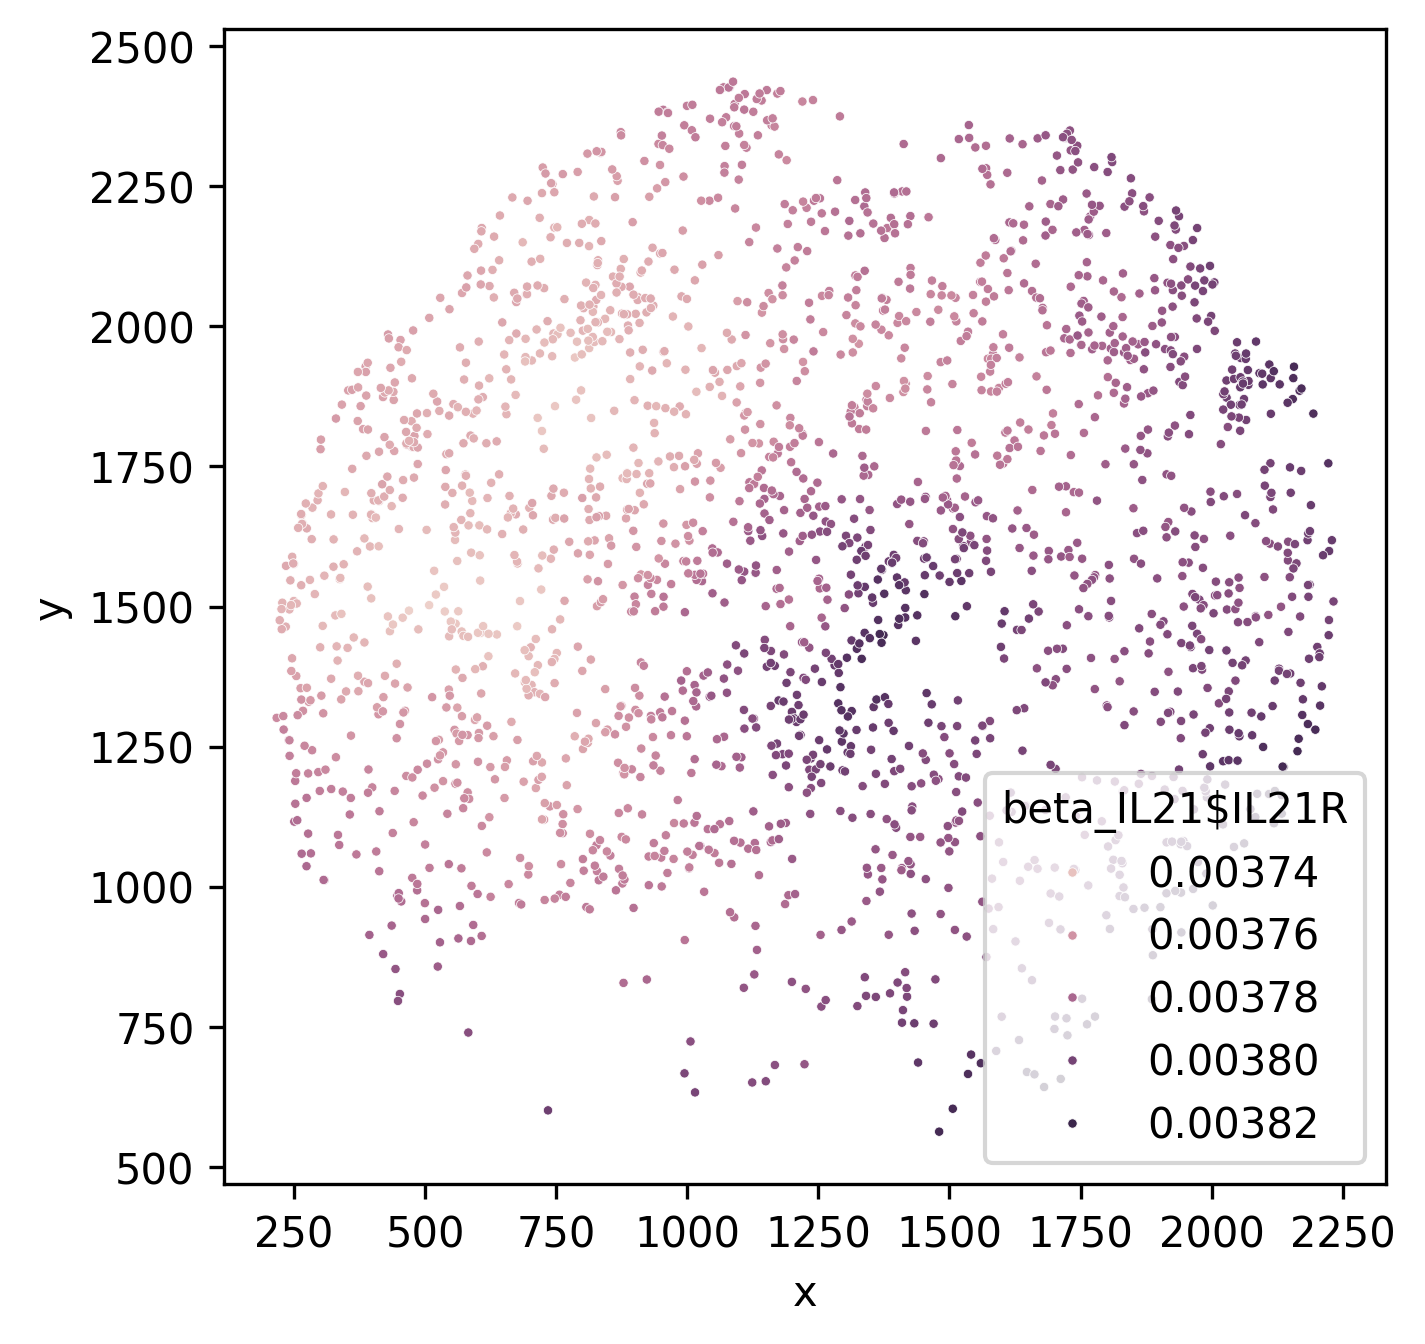

In [41]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['figure.dpi'] = 150

sns.scatterplot(
    data=betadata.join(xy)[adata.obs.cell_type == 'CD8+ T'],
    x='x',
    y='y', 
    s=5,
    hue='beta_IL21$IL21R',
)